In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, lars_path
sns.set()

Populating the interactive namespace from numpy and matplotlib


### Load Data

In [2]:
phone_df = pd.read_csv('Data/phones_cleaned.csv')
phone_df

,Brand,Price,Launch Year,OS,CPU,CPU Architecture,RAM,Display Type,Screen Size,Screen to Body Ratio,...,Bluetooth,GPS,NFC,FM Radio,Loudspeaker,Fingerprint Sensor,Waterproof,Wireless Charging,Heart Rate Monitor,Volume
0,Samsung,17999.0,2021.0,Android,Octa core,64 bit,6 GB,Other,6.70,86.66,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,118802.915
1,Other,11999.0,2021.0,Android,Octa core,64 bit,4 GB,IPS LCD,6.50,83.45,...,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,116122.775
2,Samsung,12999.0,2021.0,Android,Octa core,64 bit,4 GB,Other,6.40,83.89,...,Yes,Yes,No,No,Yes,Yes,No,No,No,109630.260
3,Other,13199.0,2021.0,Android,Octa core,64 bit,4 GB,IPS LCD,6.60,84.88,...,Yes,Yes,No,No,Yes,Yes,No,No,No,105311.175
4,Other,13999.0,2021.0,Android,Octa core,64 bit,6 GB,Other,6.43,83.53,...,Yes,Yes,No,No,Yes,Yes,Yes,No,No,97988.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,Other,18990.0,2021.0,Android,Octa core,64 bit,6 GB,IPS LCD,6.67,84.13,...,Yes,Yes,No,No,Yes,Yes,No,No,No,122559.360
2654,Other,40690.0,2021.0,Android,Octa core,64 bit,8 GB,Other,6.65,82.42,...,Yes,Yes,Yes,No,Yes,Yes,No,No,No,127487.100
2655,Other,52590.0,2021.0,Android,Octa core,64 bit,8 GB,Other,6.70,91.36,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,96086.250
2656,Other,30490.0,2021.0,Android,Octa core,64 bit,8 GB,Other,6.44,84.98,...,Yes,Yes,No,No,Yes,Yes,No,No,No,86015.608


In [3]:
phone_df['Launch Year'] = phone_df['Launch Year'].astype(str)

In [4]:
numeric_cols = ['Price', 'Screen Size', 'Screen to Body Ratio', 'Height', 'Width',
                'Thickness','Weight', 'Image Resolution', 'Capacity', 'Volume']

In [5]:
phone_df = phone_df.fillna(phone_df.mean())

C:\Users\abdal\AppData\Local\Temp/ipykernel_10592/1930700860.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phone_df = phone_df.fillna(phone_df.mean())


### Correlation

In [6]:
phone_df.corr()

,Price,Screen Size,Screen to Body Ratio,Height,Width,Thickness,Weight,Image Resolution,Capacity,Volume
Price,1.000000,0.375545,0.478329,0.201299,0.180418,-0.049905,0.403943,0.315441,0.196027,0.104653
Screen Size,0.375545,1.000000,0.823641,0.839846,0.585208,-0.134976,0.660190,0.595631,0.780852,0.436595
Screen to Body Ratio,0.478329,0.823641,1.000000,0.659612,0.385623,-0.144658,0.572457,0.509183,0.568758,0.292054
Height,0.201299,0.839846,0.659612,1.000000,0.693911,-0.063996,0.713943,0.520732,0.733860,0.592254
Width,0.180418,0.585208,0.385623,0.693911,1.000000,-0.134343,0.563885,0.210994,0.462324,0.514291
Thickness,-0.049905,-0.134976,-0.144658,-0.063996,-0.134343,1.000000,0.279092,0.001407,0.125468,0.712789
Weight,0.403943,0.660190,0.572457,0.713943,0.563885,0.279092,1.000000,0.453539,0.657738,0.711364
Image Resolution,0.315441,0.595631,0.509183,0.520732,0.210994,0.001407,0.453539,1.000000,0.552721,0.281195
Capacity,0.196027,0.780852,0.568758,0.733860,0.462324,0.125468,0.657738,0.552721,1.000000,0.555316
Volume,0.104653,0.436595,0.292054,0.592254,0.514291,0.712789,0.711364,0.281195,0.555316,1.000000


In [7]:
#sns.pairplot(phone_df);
#plt.savefig('pairplot.png')

## Check for Outliers (Boxplot)

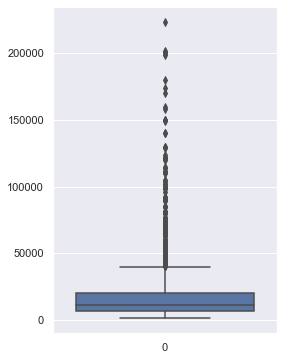

In [8]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=phone_df['Price']);

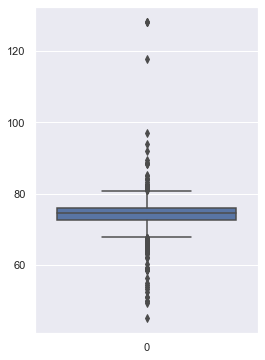

In [9]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=phone_df['Width']);

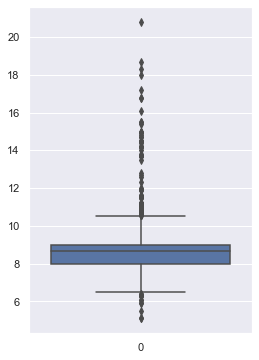

In [10]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=phone_df['Thickness']);

## Drop Outliers

- Calulate the z-score of each value in the column and take the absolute value of it.

In [11]:
phone_df = phone_df[(np.abs(stats.zscore(phone_df[numeric_cols])) < 3).all(axis=1)]

In [12]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2657
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 2473 non-null   object 
 1   Price                 2473 non-null   float64
 2   Launch Year           2473 non-null   object 
 3   OS                    2473 non-null   object 
 4   CPU                   2473 non-null   object 
 5   CPU Architecture      1872 non-null   object 
 6   RAM                   2473 non-null   object 
 7   Display Type          2473 non-null   object 
 8   Screen Size           2473 non-null   float64
 9   Screen to Body Ratio  2473 non-null   float64
 10  Touch Screen          2473 non-null   object 
 11  Height                2473 non-null   float64
 12  Width                 2473 non-null   float64
 13  Thickness             2473 non-null   float64
 14  Weight                2473 non-null   float64
 15  Material             

### Dummy (Indicator) Variables

In [13]:
phone_dumm_df = pd.get_dummies(phone_df)

### Approximate Volume (Feature Engineering)

In [14]:
def get_volume(height, width, thickness):
    return height * width * thickness

In [15]:
phone_df['Volume'] = phone_df.apply(lambda x: get_volume(x.Height, x.Width, x.Thickness), axis=1)

### Split the Data

In [16]:
X = phone_dumm_df.drop(columns=['Price'], axis=1)
y = phone_dumm_df['Price']

In [17]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

### Baseline Linear Regression

In [19]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

lin_reg_est.fit(X_train, y_train)

[0.79348469 0.77916125 0.85610833 0.78419985 0.83712293]
Linear Reg Mean Score:  0.8100154085657542


LinearRegression()

### Evaluation

Evaluation of predicted values on training data values

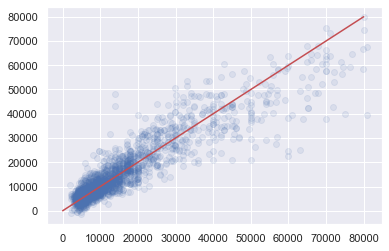

In [20]:
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.1)
plt.plot([0, 80000], [0, 80000], c='r');

Evaluation of predicted values on test data values

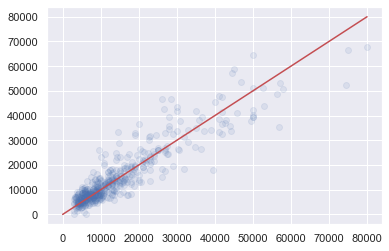

In [21]:
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred, alpha=0.1)
plt.plot([0, 80000], [0, 80000], c='r');

Loss calculated from the predicted values and actual values

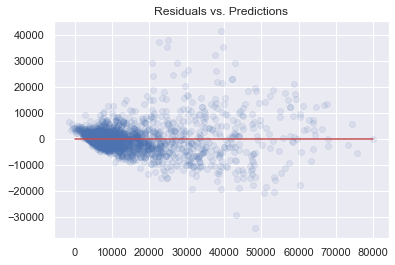

In [22]:
lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals, alpha=0.1)
plt.plot([0, 80000], [0, 0], c='r')
plt.title("Residuals vs. Predictions");

Volume column is calculated from the height, width, and thickness of each phone

### Lasso, Ridge, & ElasticNet

Scale the values

In [23]:
scaler = StandardScaler()
scaler.fit(X)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)

In [24]:
X_train_sc = scaler.transform(X_train)
X_holdout_sc = scaler.transform(X_holdout)

Train the models on the training data

In [25]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, return_train_score=False)
    grid_est.fit(X, y)
    
    df = pd.DataFrame(grid_est.cv_results_)
    
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
        
    return grid_est

In [26]:
lasso_grid_est = build_grid_search_est(Lasso(), X_train_sc, y_train, cv=kfold, alpha=np.logspace(-4, -1, 30))

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.739e+10, tolerance: 3.415e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.824e+10, tolerance: 3.487e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.666e+10, tolerance: 3.376e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+10, tolerance: 3.408e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.822e+10, tolerance: 3.460e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.728e+10, tolerance: 3.415e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.776e+10, tolerance: 3.487e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.633e+10, tolerance: 3.376e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+10, tolerance: 3.408e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.665e+10, tolerance: 3.460e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.418e+10, tolerance: 3.487e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+10, tolerance: 3.376e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.941e+10, tolerance: 3.408e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+10, tolerance: 3.460e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

In [27]:
ridge_grid_est = build_grid_search_est(Ridge(), X_train_sc, y_train, cv=kfold, alpha=np.logspace(-4, -1, 10))

In [28]:
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train_sc, y_train, cv=kfold, alpha=np.logspace(-4, 0.1, 10))

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.740e+10, tolerance: 3.415e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+10, tolerance: 3.487e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.353e+10, tolerance: 3.376e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.206e+10, tolerance: 3.408e+07
  model = cd_fast.enet_coordinate_descent(
c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

### Loss Function

Calculate loss of each model using:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- Error Sum of Squares (SSE)

In [29]:
def loss_func(y_hold, y_pred):
    print(f'MAE: {format(mean_absolute_error(y_hold, y_pred), ".2f")}')
    print(f'RMSE: {format(mean_squared_error(y_hold, y_pred, squared=False), ".2f")}')
    print(f'SSE: {format(np.sum((y_hold - y_pred)**2), ".2f")}')

### 

Linear Regression R2: 0.8708464486516291 

MAE: 3277.46
RMSE: 4911.72
SSE: 5983006606.04


c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


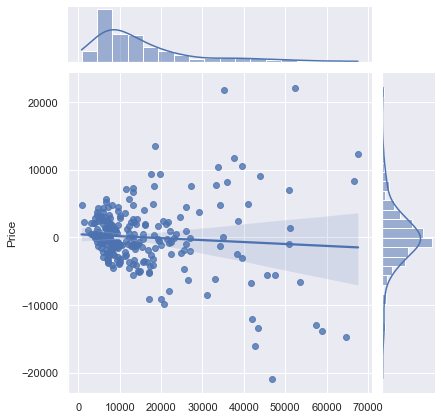

In [30]:
y_pred = lin_reg_est.predict(X_holdout)
print("Linear Regression R2:", r2_score(y_holdout, y_pred), '\n')
loss_func(y_holdout, y_pred)
sns.jointplot(y_pred, y_holdout - y_pred, kind='reg')

Lasso Regression R2: 0.8738624622859356 

MAE: 3202.47
RMSE: 4854.03
SSE: 5843290513.76


c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


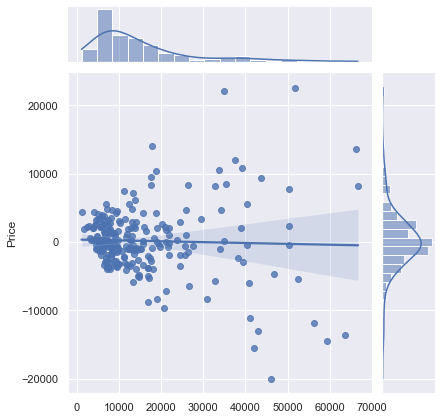

In [31]:
y_pred = lasso_grid_est.predict(X_holdout_sc)
print("Lasso Regression R2:", r2_score(y_holdout, y_pred), '\n')
loss_func(y_holdout, y_pred)
sns.jointplot(y_pred, y_holdout - y_pred, kind='reg')

Ridge Regression R2: 0.8738631319141528 

MAE: 3203.46
RMSE: 4854.02
SSE: 5843259493.40


c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


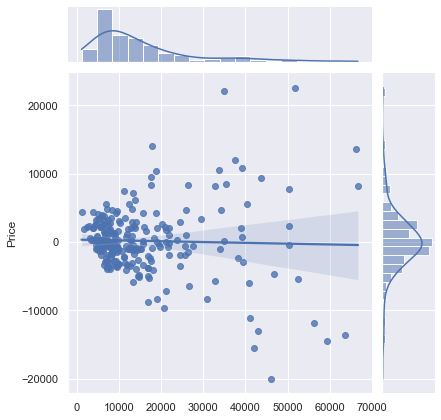

In [32]:
y_pred = ridge_grid_est.predict(X_holdout_sc)
print("Ridge Regression R2:", r2_score(y_holdout, y_pred), '\n')
loss_func(y_holdout, y_pred)
sns.jointplot(y_pred, y_holdout - y_pred, kind='reg')

ElasticNet Regression R2: 0.8746795574928716 

MAE: 3183.75
RMSE: 4838.29
SSE: 5805438778.60


c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


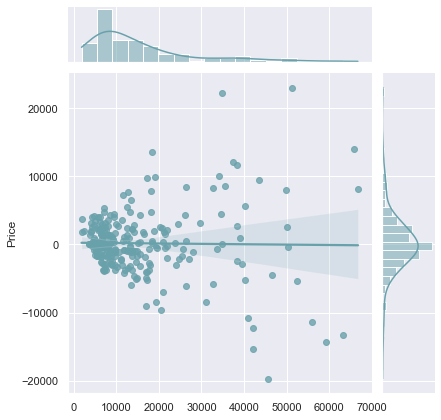

In [33]:
y_pred = elastic_net_grid_est.predict(X_holdout_sc)
print("ElasticNet Regression R2:", r2_score(y_holdout, y_pred), '\n')
loss_func(y_holdout, y_pred)
sns.jointplot(y_pred, y_holdout - y_pred, kind='reg', color='#69A1AB')
plt.savefig('elasticnet_yhold_ypred.png', transparent=True, bbox_inches='tight')

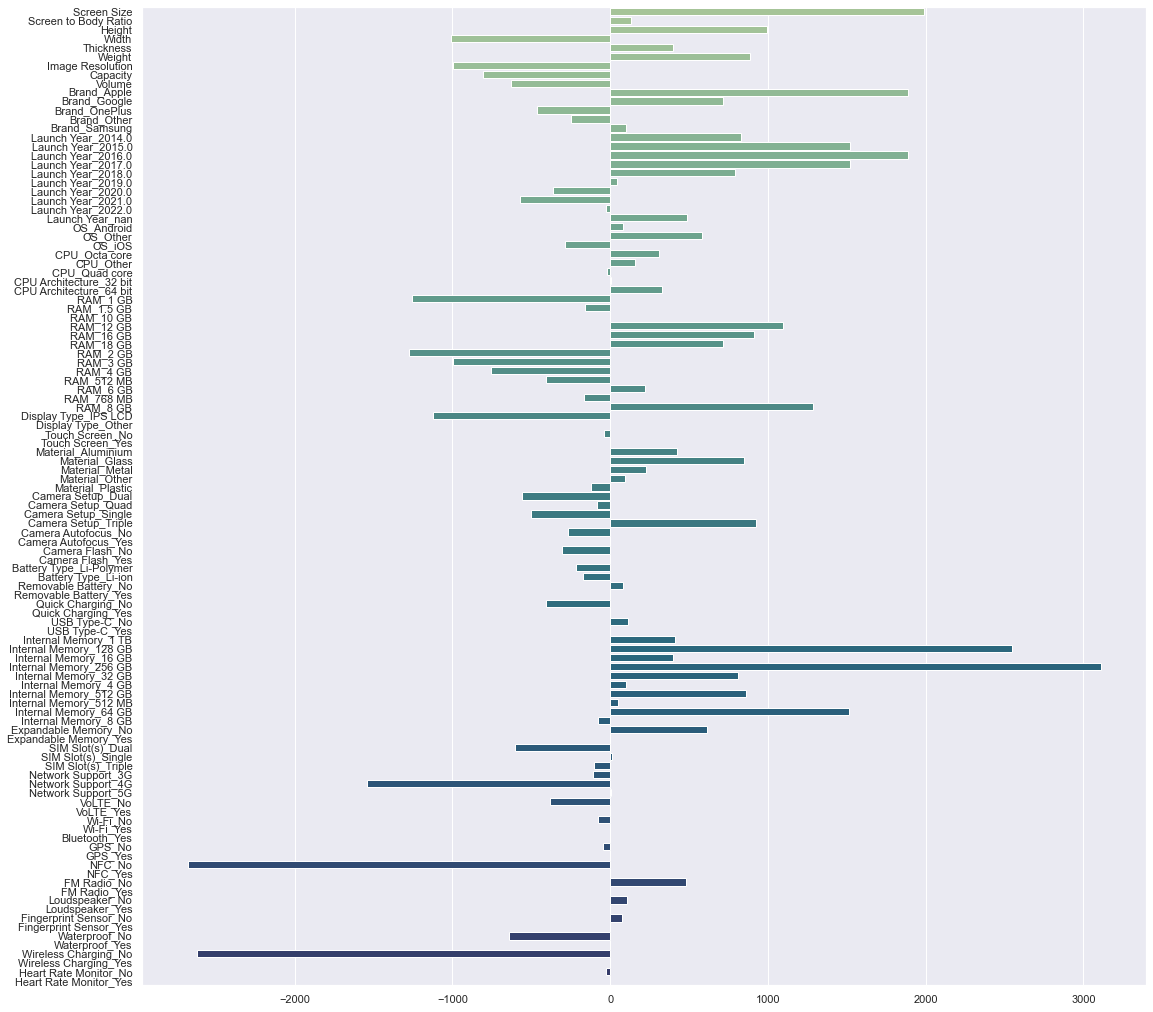

In [34]:
coefs = lasso_grid_est.best_estimator_.coef_

plt.figure(figsize(18, 18))
sns.barplot(y=X.columns, x=coefs, palette='crest');

### Other Models

In [35]:
rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_holdout)
print("Random Forest Regression:", r2_score(y_holdout, y_pred), '\n')
loss_func(y_holdout, y_pred)

Random Forest Regression: 0.7772409611745308 

MAE: 4067.23
RMSE: 6450.57
SSE: 10319257867.34


In [36]:
gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_holdout)
print("Gradient Boosted Regression:", r2_score(y_holdout, y_pred), '\n')
loss_func(y_holdout, y_pred)

Gradient Boosted Regression: 0.8765317797226382 

MAE: 3231.38
RMSE: 4802.40
SSE: 5719635037.85


In [37]:
poly = PolynomialFeatures()
lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_holdout))
print("Polynomial Regression:", r2_score(y_holdout, y_pred))
loss_func(y_holdout, y_pred)

Polynomial Regression: 0.30606053258495536
MAE: 4223.28
RMSE: 11385.22
SSE: 32146575718.50


### LARS Path of the LASSO Model

Scaling the values

In [38]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

c:\users\abdal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_least_angle.py:680: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=2.475e+02, previous alpha=2.462e+02, with an active set of 45 regressors.
  warnings.warn(


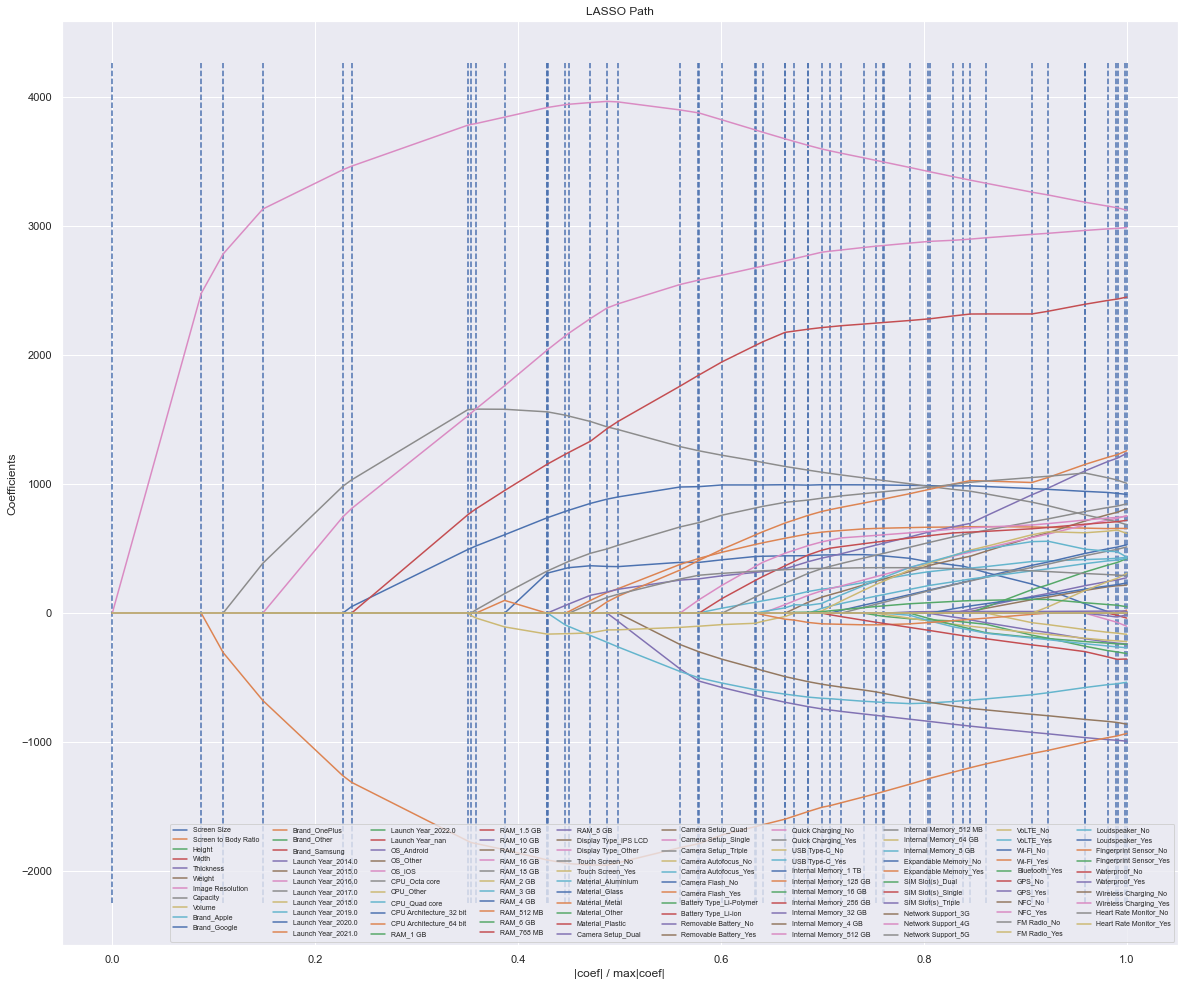

In [39]:
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(20,17))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
#plt.axis('tight')
plt.legend(X_train.columns, loc=4, ncol=10, prop={'size': 7})
plt.show()